In [9]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [10]:
central_rrtmg_lw_bands = np.array([180,425,565,665,760,900,
                                   1030,1130,1285,1435,1640,
                                   1940,2165,2315,2490,2925])

In [66]:
delwave = np.array([340, 150, 130, 70, 120, 160,
                    100, 100, 210, 90, 320, 280,
                    170, 130, 220, 650])

In [67]:
nu_lower_rrtmg = np.array([10., 350., 500., 630., 700., 820., 980., 1080., 1180., 1390., 1480., 1800., 2080., 2250., 2380., 2600.])
nu_upper_rrtmg = np.array([350., 500., 630., 700., 820., 980., 1080., 1180., 1390., 1480., 1800., 2080., 2250., 2380., 2600., 3250.])

In [37]:
lambdanu = np.load("./lambdanu_ctrl.pickle", allow_pickle=True)['lambdanu']

In [38]:
rfm_lambdanu = xr.DataArray(dims=['Ts', 'wavenumber'], coords={'Ts': np.arange(280, 326), 'wavenumber': lambdanu['nu']})

for ts in np.arange(280, 326):
    rfm_lambdanu.loc[dict(Ts=ts)] = lambdanu[ts]['lambda']

In [68]:
rfm_lambda_bands = xr.DataArray(dims=['Ts', 'band'], coords={'Ts': np.arange(280, 326), 'band':central_rrtmg_lw_bands})

for ts in np.arange(280, 326):
    for idx, nuband in enumerate(central_rrtmg_lw_bands):
        rfm_lambda_bands.loc[dict(Ts=ts, band=nuband)] = rfm_lambdanu.loc[dict(Ts=ts)].sel(wavenumber=slice(nu_lower_rrtmg[idx], nu_upper_rrtmg[idx])).integrate('wavenumber')

In [39]:
lambdanu_0ppm = np.load("./lambdanu_0ppm.pickle", allow_pickle=True)['lambdanu']

In [40]:
rfm_lambdanu_0ppm = xr.DataArray(dims=['Ts', 'wavenumber'], coords={'Ts': np.arange(280, 326), 'wavenumber': lambdanu_0ppm['nu']})

for ts in np.arange(280, 326):
    rfm_lambdanu_0ppm.loc[dict(Ts=ts)] = lambdanu_0ppm [ts]['lambda']

In [69]:
rfm_lambda_bands_0ppm = xr.DataArray(dims=['Ts', 'band'], coords={'Ts': np.arange(280, 326), 'band':central_rrtmg_lw_bands})

for ts in np.arange(280, 326):
    for idx, nuband in enumerate(central_rrtmg_lw_bands):
        rfm_lambda_bands_0ppm.loc[dict(Ts=ts, band=nuband)] = rfm_lambdanu_0ppm.loc[dict(Ts=ts)].sel(wavenumber=slice(nu_lower_rrtmg[idx], nu_upper_rrtmg[idx])).integrate('wavenumber')

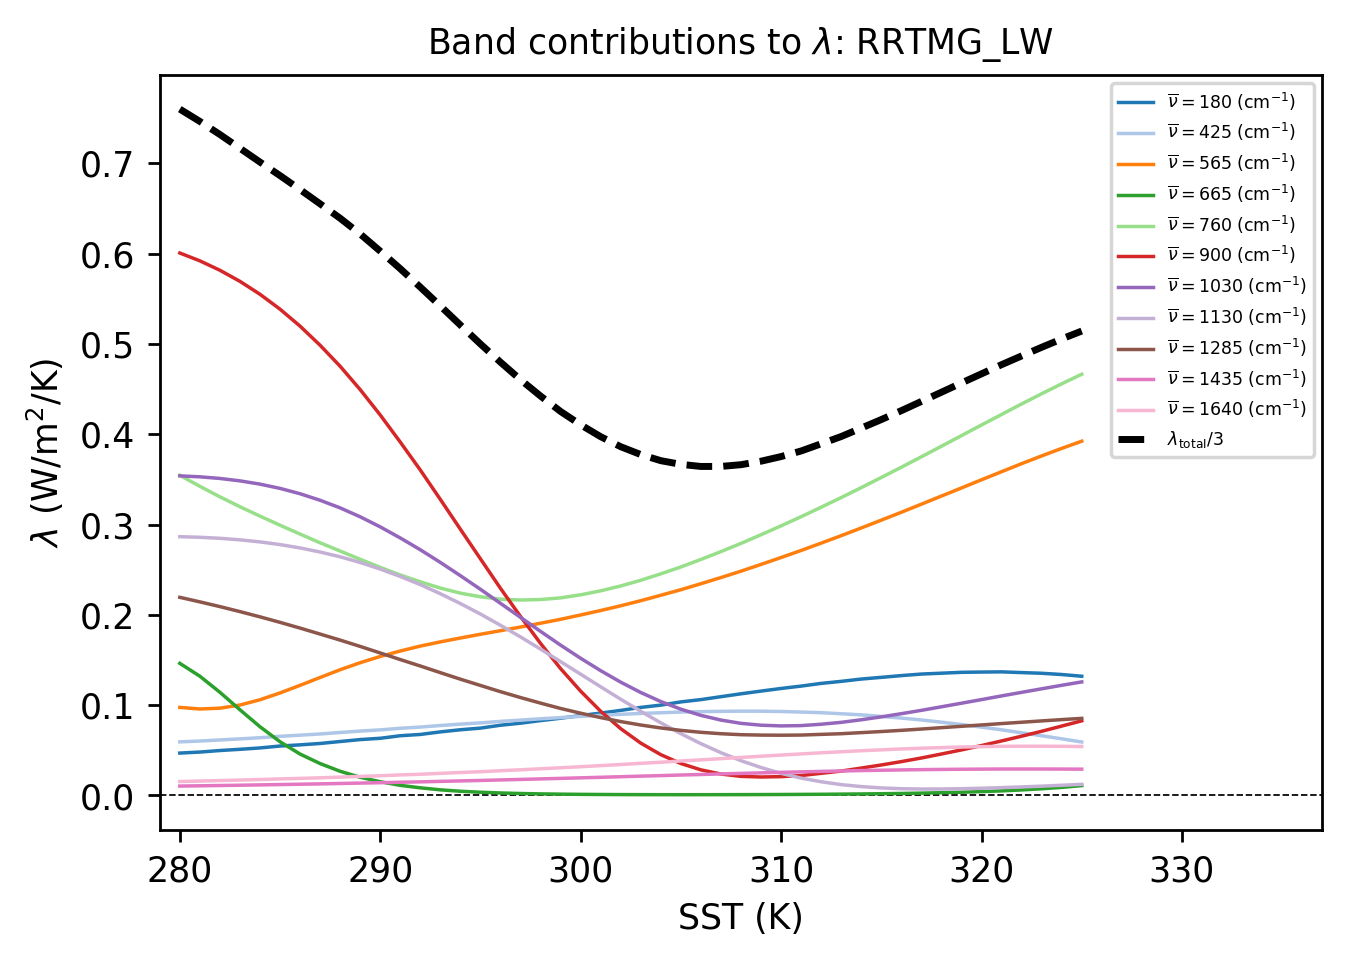

In [70]:
fig, ax = plt.subplots(dpi=250, figsize=(6,4))

n=len(central_rrtmg_lw_bands)
colors = plt.cm.tab20(np.linspace(0,1,n)) # Set1

for i in range(n)[:11]:
    string = fr"$\overline{{\nu}}=${central_rrtmg_lw_bands[i]} (cm$^{{-1}}$)"   # + fr"$\Delta\nu=${delwave[i]} (cm$^{{-1}}$)" #+ "\n" +
    ax.plot(np.arange(280, 326), rfm_lambda_bands[:,i], color=colors[i], label=string, lw=1)

_ = (rfm_lambda_bands.sum('band')/3).plot(ax=ax, color='black', lw=2, linestyle='--', label=r'$\lambda_{\mathrm{total}}$/3')

ax.set_xlabel(r"SST (K)")
ax.set_ylabel(r"$\lambda$ (W/m$^{2}$/K)")

ax.set_title(r"Band contributions to $\lambda$: RRTMG_LW", fontsize=10)

ax.hlines(y=0, xmin=279, xmax=337, linestyle='--', color='k', lw=0.5)
ax.set_xlim(279, 337)
ax.legend(loc='upper right', prop={'size': 5})

#plt.savefig("./Figs/lambda_band_contributions_with_total.png", dpi=400, facecolor='white', bbox_inches='tight')

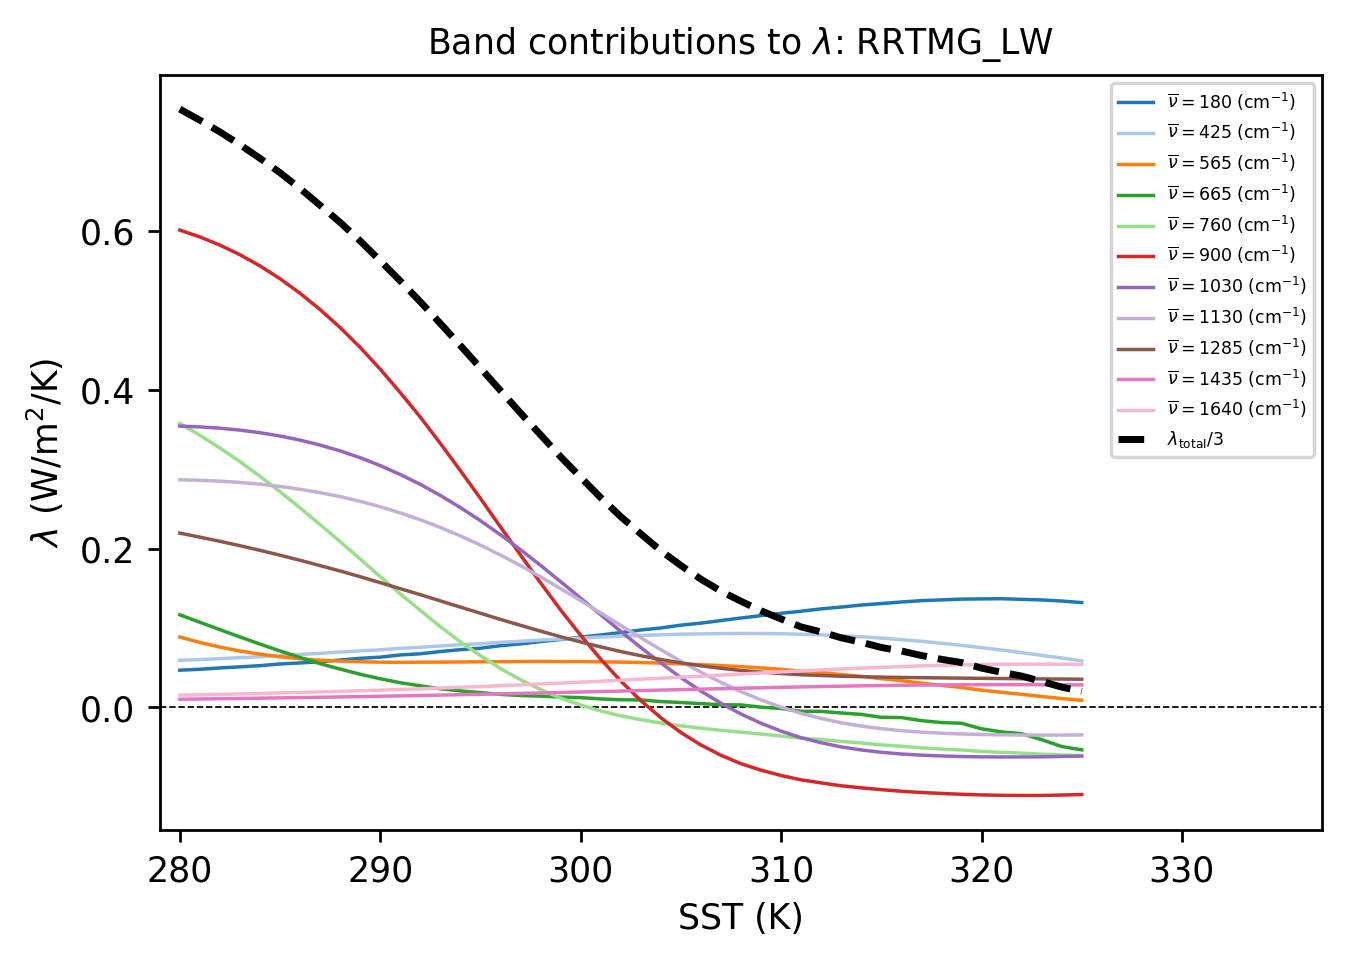

In [71]:
fig, ax = plt.subplots(dpi=250, figsize=(6,4))

n=len(central_rrtmg_lw_bands)
colors = plt.cm.tab20(np.linspace(0,1,n)) # Set1

for i in range(n)[:11]:
    string = fr"$\overline{{\nu}}=${central_rrtmg_lw_bands[i]} (cm$^{{-1}}$)"   
    ax.plot(np.arange(280, 326), rfm_lambda_bands_0ppm[:,i], color=colors[i], label=string, lw=1)

_ = (rfm_lambda_bands_0ppm.sum('band')/3).plot(ax=ax, color='black', lw=2, linestyle='--', label=r'$\lambda_{\mathrm{total}}$/3')

ax.set_xlabel(r"SST (K)")
ax.set_ylabel(r"$\lambda$ (W/m$^{2}$/K)")

ax.set_title(r"Band contributions to $\lambda$: RRTMG_LW", fontsize=10)

ax.hlines(y=0, xmin=279, xmax=337, linestyle='--', color='k', lw=0.5)
ax.set_xlim(279, 337)
ax.legend(loc='upper right', prop={'size': 5})

#plt.savefig("./Figs/lambda_band_contributions_with_total.png", dpi=400, facecolor='white', bbox_inches='tight')

(-0.002, 0.004)

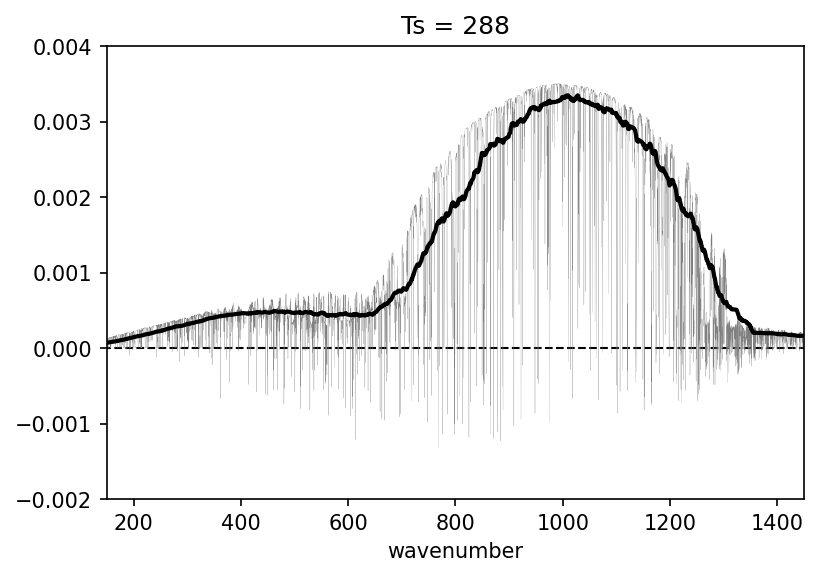

In [59]:
fig, ax = plt.subplots(dpi=150)

rfm_lambdanu_0ppm.sel(Ts=288).plot(ax=ax, lw=0.1, color='grey')

rfm_lambdanu_0ppm.sel(Ts=288).rolling(wavenumber=500).mean().plot(ax=ax, lw=2, color='black')


ax.hlines(y=0, xmin=0, xmax=1450, linestyle='--', color='k', lw=1)
ax.set_xlim(150, 1450)
ax.set_ylim(-0.002, 0.004)

(-0.002, 0.004)

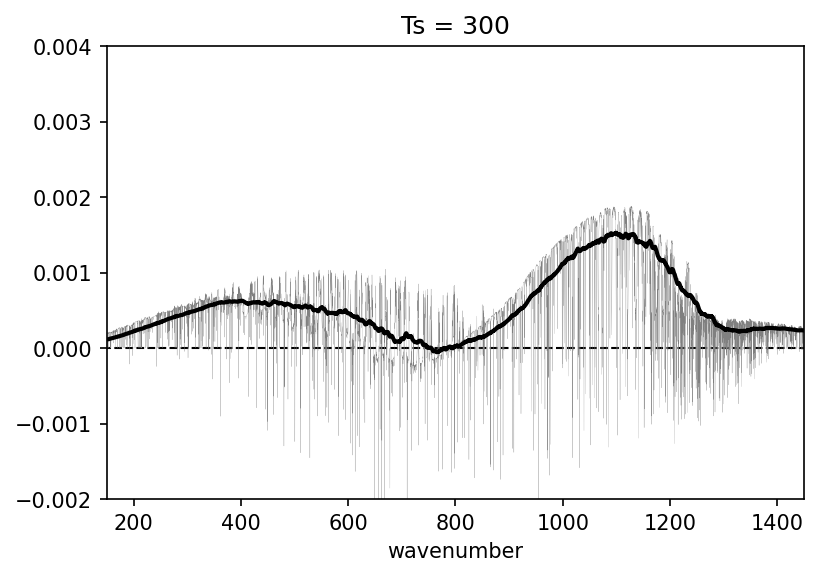

In [60]:
temp = 300

fig, ax = plt.subplots(dpi=150)

rfm_lambdanu_0ppm.sel(Ts=temp).plot(ax=ax, lw=0.1, color='grey')

rfm_lambdanu_0ppm.sel(Ts=temp).rolling(wavenumber=500).mean().plot(ax=ax, lw=2, color='black')


ax.hlines(y=0, xmin=0, xmax=1450, linestyle='--', color='k', lw=1)
ax.set_xlim(150, 1450)
ax.set_ylim(-0.002, 0.004)

(-0.002, 0.004)

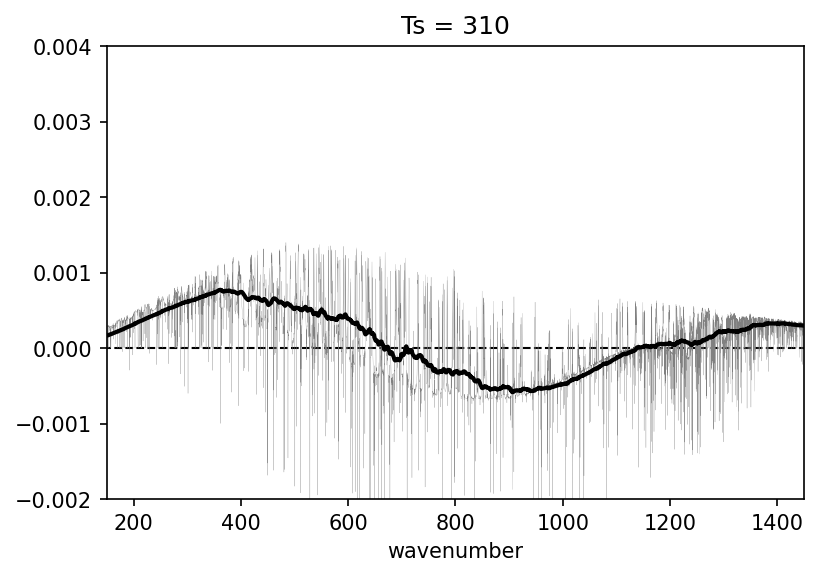

In [61]:
temp = 310

fig, ax = plt.subplots(dpi=150)

rfm_lambdanu_0ppm.sel(Ts=temp).plot(ax=ax, lw=0.1, color='grey')

rfm_lambdanu_0ppm.sel(Ts=temp).rolling(wavenumber=500).mean().plot(ax=ax, lw=2, color='black')


ax.hlines(y=0, xmin=0, xmax=1450, linestyle='--', color='k', lw=1)
ax.set_xlim(150, 1450)
ax.set_ylim(-0.002, 0.004)

(-0.002, 0.004)

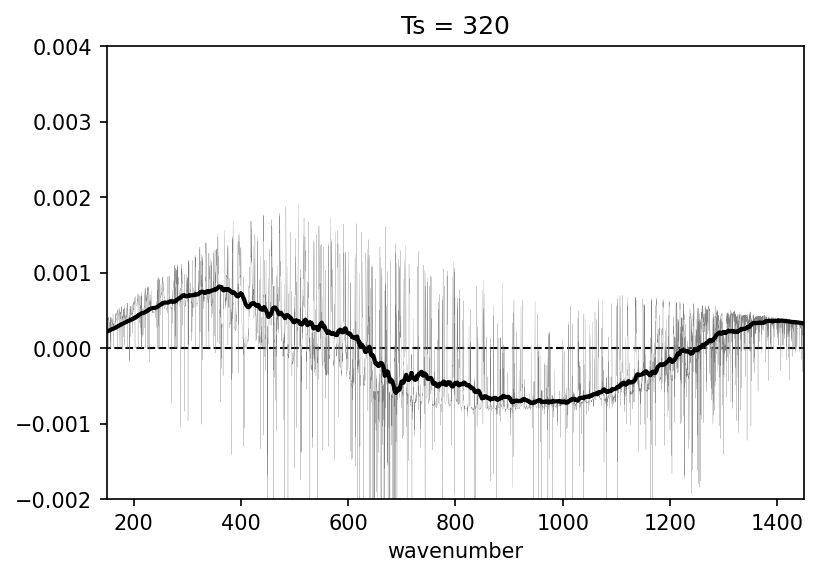

In [62]:
temp = 320

fig, ax = plt.subplots(dpi=150)

rfm_lambdanu_0ppm.sel(Ts=temp).plot(ax=ax, lw=0.1, color='grey')

rfm_lambdanu_0ppm.sel(Ts=temp).rolling(wavenumber=500).mean().plot(ax=ax, lw=2, color='black')


ax.hlines(y=0, xmin=0, xmax=1450, linestyle='--', color='k', lw=1)
ax.set_xlim(150, 1450)
ax.set_ylim(-0.002, 0.004)

(-0.002, 0.004)

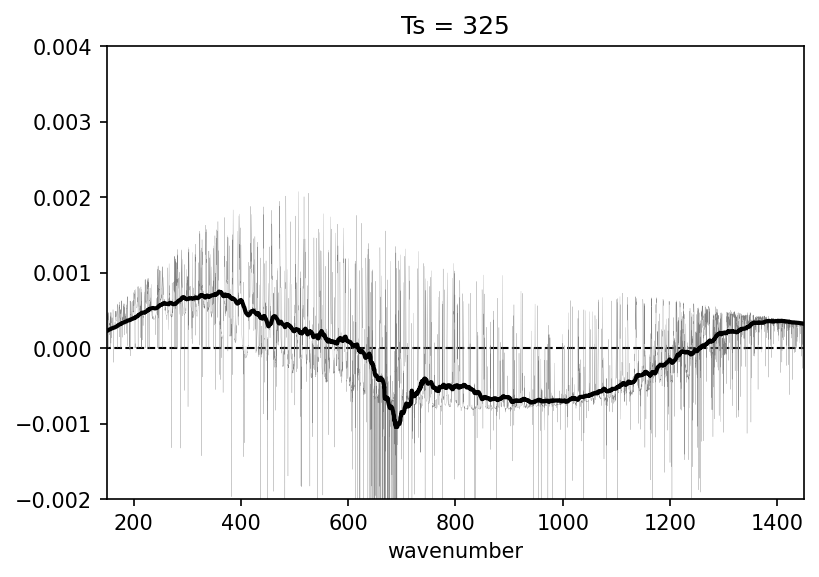

In [63]:
temp = 325

fig, ax = plt.subplots(dpi=150)

rfm_lambdanu_0ppm.sel(Ts=temp).plot(ax=ax, lw=0.1, color='grey')

rfm_lambdanu_0ppm.sel(Ts=temp).rolling(wavenumber=500).mean().plot(ax=ax, lw=2, color='black')


ax.hlines(y=0, xmin=0, xmax=1450, linestyle='--', color='k', lw=1)
ax.set_xlim(150, 1450)
ax.set_ylim(-0.002, 0.004)